## Import Libraries and Modules

we'll start by importing the most crucial libraries and modules that we'll need. That includes of course the data manipulation libraries, the data visualization libraries, and the four machine learning algorithms that we'll be comparing to each other


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Load and Explore the Data

Here we start by loading our Dataset into a dataframe and looking at the first 5 rows, to get a look at the data and features we're dealing with. 

In [155]:
titanic = pd.read_csv('Data/tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Here we will take a look at the shape of our dataset, the number of rows and columns, and columns that we'll be dealing with. And already by looking at the columns here, we can see that there are some columns that we can drop, because it won't impact our predictor feature (Survived), those are: PassengerId, Name

In [156]:


print(f'Shape of Dataset: {titanic.shape}')
print(f'Dataset Columns: {titanic.columns}')


Shape of Dataset: (418, 12)
Dataset Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


And before we continue we'll also be using the describe() method to get a statistical summary of the data, and the info() method to get a concise summary of the data, including the number of non-null values in each column to see if there are any missing values.

In [157]:
titanic.info()
print(titanic.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Data Cleaning

Here we can see that the Cabin Column has a lot of missing values, and we can also see that the Age column has some missing values. So next up we'll drop the columns that we don't need, or the columns that we can't use since there's so many missing values, and we can therefore risk introducing a bias into our models.

So let's drop the columns that we don't need

In [158]:
titanic_dropped = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print(titanic_dropped.columns)
titanic_dropped.head()


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


Next thing we will be doing is renaming some of the columns, to give us more clarity over what each column is and what it tells us

In [181]:
titanic_dropped.rename(columns={
        'Pclass': 'Class',
        'SibSp': 'NumSiblingsSpouse',
        'Parch': 'NumAssociatedFamily',
    }, inplace=True)

titanic_dropped.columns

print(len(titanic_dropped[(titanic_dropped['Sex'] == 'female') & (titanic_dropped['Survived'] == 0)]))

0


### Handling NaN values

#### Age

so for the Age column a big majority of the values are non null values, so that means it would be appropriate to fill the Age column with the mean age for the other passengers.

In [160]:
mean_age = np.mean(titanic_dropped['Age'])
titanic_dropped['Age'].fillna(float(mean_age), inplace=True)
print(f'No NaN values in age col: {len(titanic_dropped.Age[titanic_dropped.Age.isnull()])}')

No NaN values in age col: 0


### Fare

In the Fare column we only have one NaN value and therefore we're just going to drop the row containing that NaN value.

In [161]:
titanic_dropped = titanic_dropped.dropna()
print(f'No of NaN values in Dataset: {len(titanic_dropped[titanic_dropped.isnull().any(axis=1)])}')

No of NaN values in Dataset: 0


### Correcting Data Types

Pandas automatically loads the Survived column in as the data type int64, but in reality it should be of the bool value, since it's binary, so we'll be changing that.


In [162]:
titanic_dropped['Survived'] = titanic_dropped['Survived'].astype('bool')
titanic_dropped.dtypes

Survived                  bool
Class                    int64
Sex                     object
Age                    float64
NumSiblingsSpouse        int64
NumAssociatedFamily      int64
Fare                   float64
Embarked                object
dtype: object

## Exploratory Data Analysis

### Data Visualizations

### Distribution Plots

So to get a better understanding of our data, we'll be using some data visualizations. That can help us make sure that we're not introducing any bias into our models, and that we're not missing any important features.

30.20010256854757


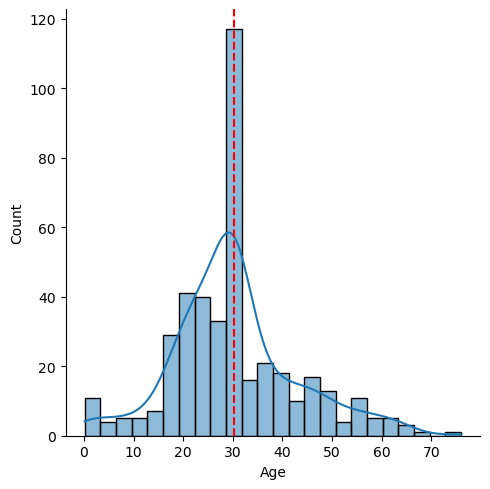

<Figure size 640x480 with 0 Axes>

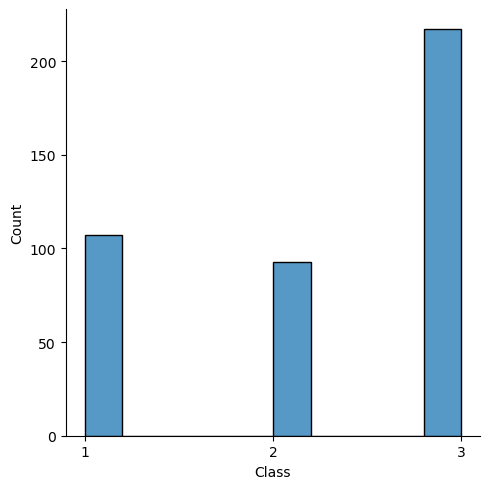

<Figure size 640x480 with 0 Axes>

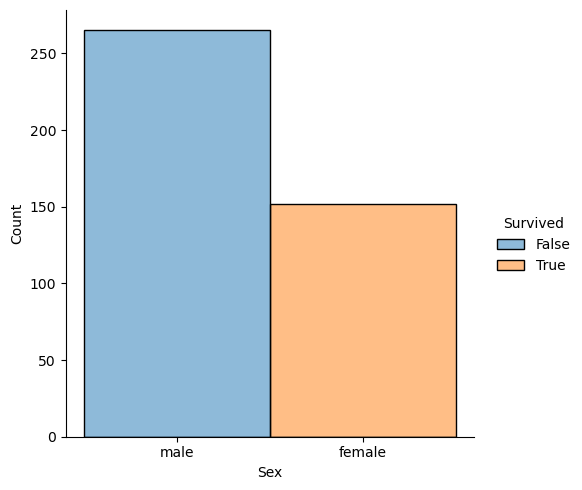

In [178]:
mean_age = np.mean(titanic_dropped['Age'])
print(mean_age)
sns.displot(data=titanic_dropped, x='Age', kde=True)
plt.axvline(float(mean_age), color='red', linestyle='--', label='Mean Age')
plt.show()
plt.clf()

sns.displot(data=titanic_dropped, x='Class', kde=False)
plt.xticks([1, 2, 3])
plt.show()
plt.clf()

sns.displot(data=titanic_dropped, x='Sex', kde=False, hue='Survived')

#### Countplots (hue = Survived)

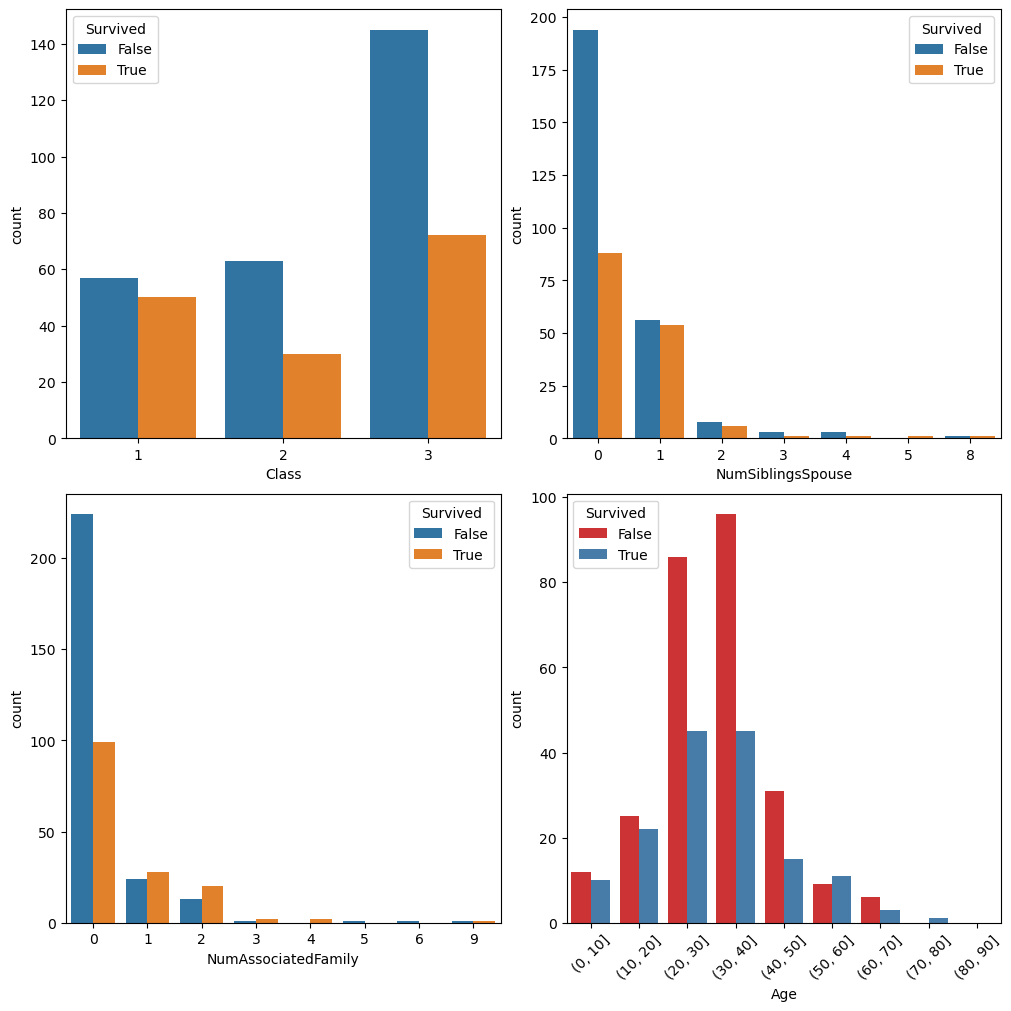

In [164]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)


sns.countplot(data=titanic_dropped, x="Class", hue='Survived', ax=axs[0,0])
sns.countplot(data=titanic_dropped, x="NumSiblingsSpouse", hue='Survived', ax=axs[0,1])
sns.countplot(data=titanic_dropped, x="NumAssociatedFamily", hue='Survived', ax=axs[1,0])
sns.countplot(data=titanic_dropped, x=pd.cut(titanic_dropped['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), hue='Survived', palette='Set1', ax=axs[1,1])
# rotate xtick labels
plt.setp(axs[1,1].get_xticklabels(), rotation=45)

# plt.xticks(np.arange(0, 100, 10))
plt.show()



#### Boxplots

Text(0.5, 1.0, 'Fare')

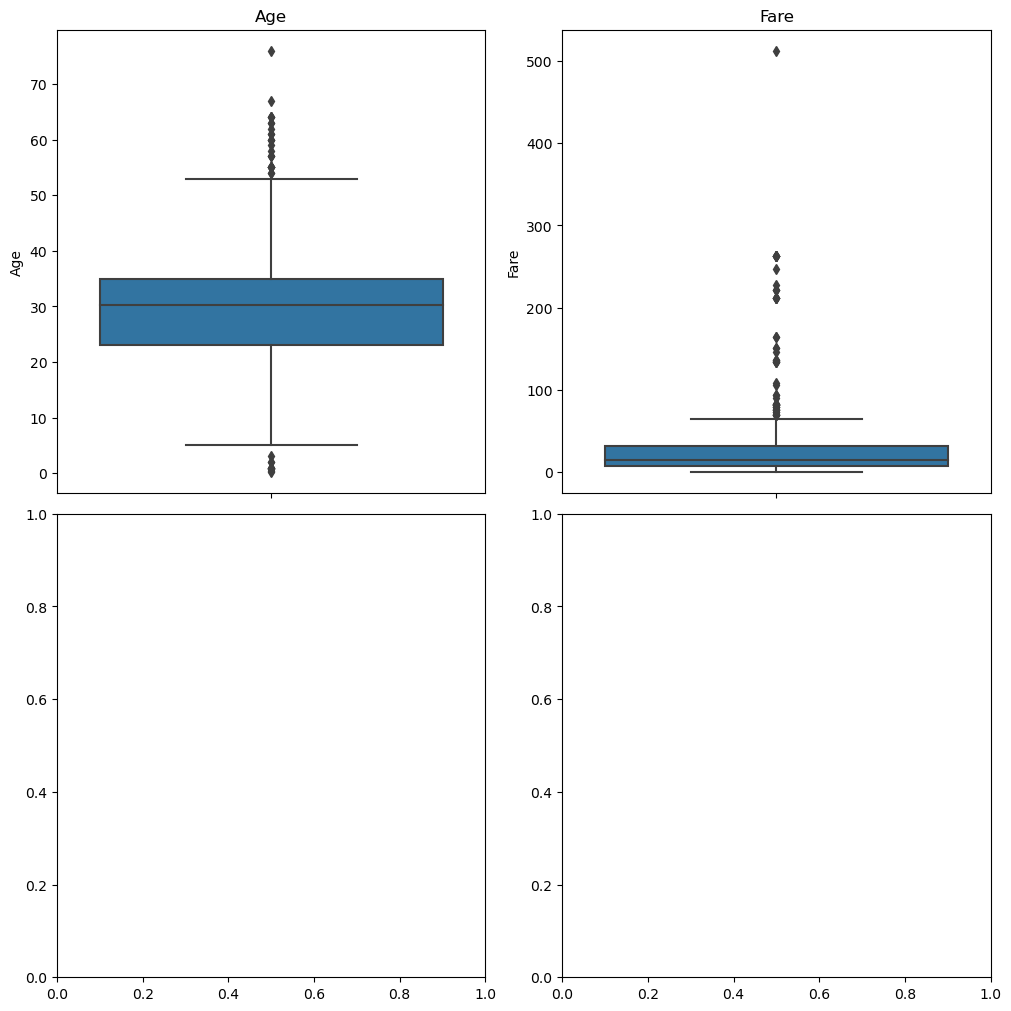

In [192]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
sns.boxplot(data=titanic_dropped, y='Age', ax=axs[0,0])
sns.boxplot(data=titanic_dropped, y='Fare', ax=axs[0,1])
# set title of figure
axs[0,0].set_title('Age')
axs[0,1].set_title('Fare')